# Matplotlib Assignment

We have the min and max temperatures in a city In India for each months of the year.  We would like to find a function to describe this and show it graphically, the dataset  given below. 

Task: 

1.fitting it to the periodic function 
2.plot the fit 

Data 

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
month = range(0,12)

In [3]:
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

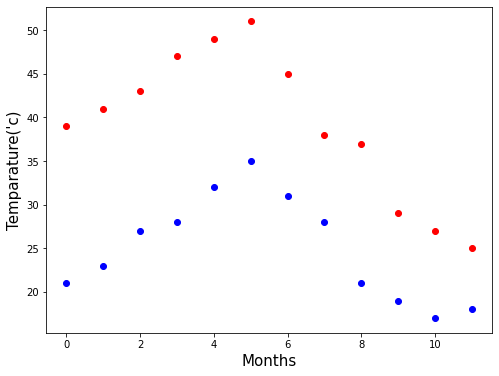

In [4]:
month = np.arange(12)
plt.figure(figsize=(8,6))
plt.plot(month, Max, 'ro')
plt.plot(month, Min, 'bo')
plt.xlabel('Months', size=15)
plt.ylabel("Temparature('c)", size=15)
plt.show()

In [5]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, month, Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, month, Min, [-40, 20, 0])

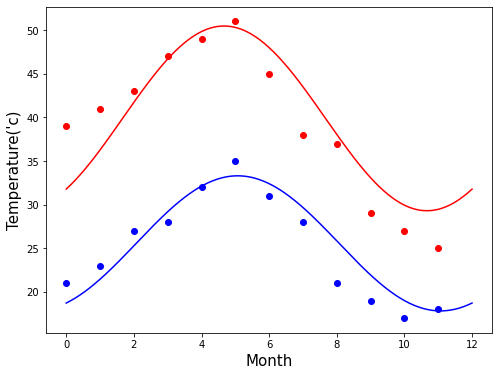

In [6]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(8,6))
plt.plot(month, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(month, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel("Month",size=15)
plt.ylabel("Temperature('c)", size=15)
plt.show()

### This assignment is for visualization using matplotlib: 
    
data to use: 
    
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv 

titanic = pd.read_csv(url) 

Charts to plot: 
    
1. Create a pie chart presenting the male/female proportion

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [7]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

In [8]:
titanic = pd.read_csv(url)

In [9]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
sex = titanic['sex'].astype('category')
sex = sex.cat.codes
sex.head()

0    0
1    1
2    0
3    1
4    0
dtype: int8

In [11]:
name = titanic['sex'].unique()
name

array(['female', 'male', nan], dtype=object)

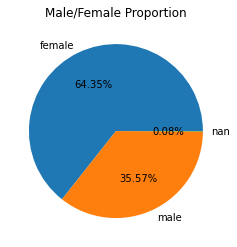

In [12]:
plt.pie(sex.value_counts(), labels = name, autopct='%1.2f%%')
plt.title('Male/Female Proportion')
plt.show()

In [13]:
fare = titanic["fare"]
age = titanic["age"]

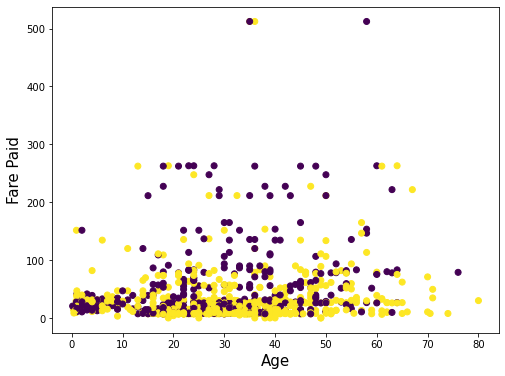

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(age, fare, c = sex)
plt.xlabel("Age", size=15)
plt.ylabel("Fare Paid", size=15)
plt.show()